# BigEarthNet dataset statistics
We want to know the number of times each Corine2018 class is used to classify pixels in the images, in other words the number of images that contain pixels of each class. In order to do that we extract the unique values for each mask linked to an image and we count the number of times each unique value is used. One other statistics that we might be interested in is the distribution of the number of classes used for each image: there might be images with only one class, images with two, or more.

We import some functions and constants developed for the project

In [2]:
#from scripts.bigearthnetv2_data_preparation import *

In development phase we have to execute the script to use the updated functions without restarting the notebook

In [3]:
%run -i lib/bigearthnetv2_lib.py

In [4]:
print("NumPy version: %s"%np.__version__)
print("GDAL version: %s"%gdal.__version__)
print("Matplotlib version: %s"%matplotlib.__version__)
print("rasterio version: %s"%rasterio.__version__)

NumPy version: 1.26.4
GDAL version: 3.10.2
Matplotlib version: 3.8.4
rasterio version: 1.4.3


In [5]:
BIGEARTHNETv2_DIR = 'data'
IMAGES_DATA_DIR = pathlib.Path(BIGEARTHNETv2_DIR + '/BigEarthNet-S2')
MASKS_DATA_DIR = pathlib.Path(BIGEARTHNETv2_DIR + '/Reference_Maps')

In [11]:
start_tile_index = 0
end_tile_index = 2
mask_list = list_mask_files(MASKS_DATA_DIR, start_tile_index, end_tile_index)

In [12]:
tile_index = 0
patch_index = 0
band_index = 0
mask_path = str(mask_list[tile_index][patch_index][band_index])
mask_path

'data\\Reference_Maps\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57\\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_reference_map.tif'

In [14]:
mask_ds = in_ds = gdal.Open(mask_path)
mask_data = mask_ds.GetRasterBand(1)
mask_array = mask_data.ReadAsArray()
unique_values = np.unique(mask_array)
print('Level 3 CLC classes: ', unique_values)

Level 3 CLC classes:  [211 231 311 313]


In [15]:
mask_array.dtype

dtype('uint16')

In [16]:
def print_unique_occurrence(u, o):
    print('Unique value: {:d} - Occurrences: {:d}\n'.format(u, o))

In [17]:
unique_values, occurrence_count = np.unique(mask_array, return_counts=True)
[print_unique_occurrence(u, o) for u, o in zip(unique_values, occurrence_count)]

Unique value: 211 - Occurrences: 7075

Unique value: 231 - Occurrences: 1154

Unique value: 311 - Occurrences: 4131

Unique value: 313 - Occurrences: 2040



[None, None, None, None]

In [18]:
corine2018_class_code(45)

999

In [19]:
corine2018_class_bucket(corine2018_class_code(45))

45

We iterate through all the mask files to extract the unique values in each of them. Every time a mask contains pixels of one of the Corine2018 classes we add 1 to the corresponding bucket.

In [23]:
start = time.time()
corine2018_buckets = collect_statistics(MASKS_DATA_DIR, start_tile_index, end_tile_index, print_msg=True)
end = time.time()
elapsed_time = end - start
print('Elapsed time (seconds): {:.2f}'.format(elapsed_time))

Number of tiles:  2
Tile: S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP
Number of patches per tile:  2
Patch:  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57
Unique values:  [211 231 311 313]
Patch:  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55
Unique values:  [211 311 313 511]
Tile: S2A_MSIL2A_20170613T101031_N9999_R022_T34VER
Number of patches per tile:  2
Patch:  S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_45
Unique values:  [523]
Patch:  S2A_MSIL2A_20170613T101031_N9999_R022_T34VER_00_46
Unique values:  [523]
Elapsed time (seconds): 0.04


## Saving the images distribution among the Corine2018 classes
We save the bucket array into a file

In [21]:
corine2018_buckets

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0.])

In [22]:
#save_statistics(buckets, 'data/statistics.txt')

## Plotting the dataset statistics
We plot a bar chart with the number of images per class of the Corine2018 classification code. The colors used are from the [Corine2018 RGB color codes](https://www.eea.europa.eu/data-and-maps/data/corine-land-cover-2/corine-land-cover-classes-and/clc_legend.csv).

In [42]:
stats = read_statistics('data/statistics.txt')

In [52]:
corine2018_buckets = np.arange(1, 46)
corine2018_colors = corine_color_map()

<BarContainer object of 45 artists>

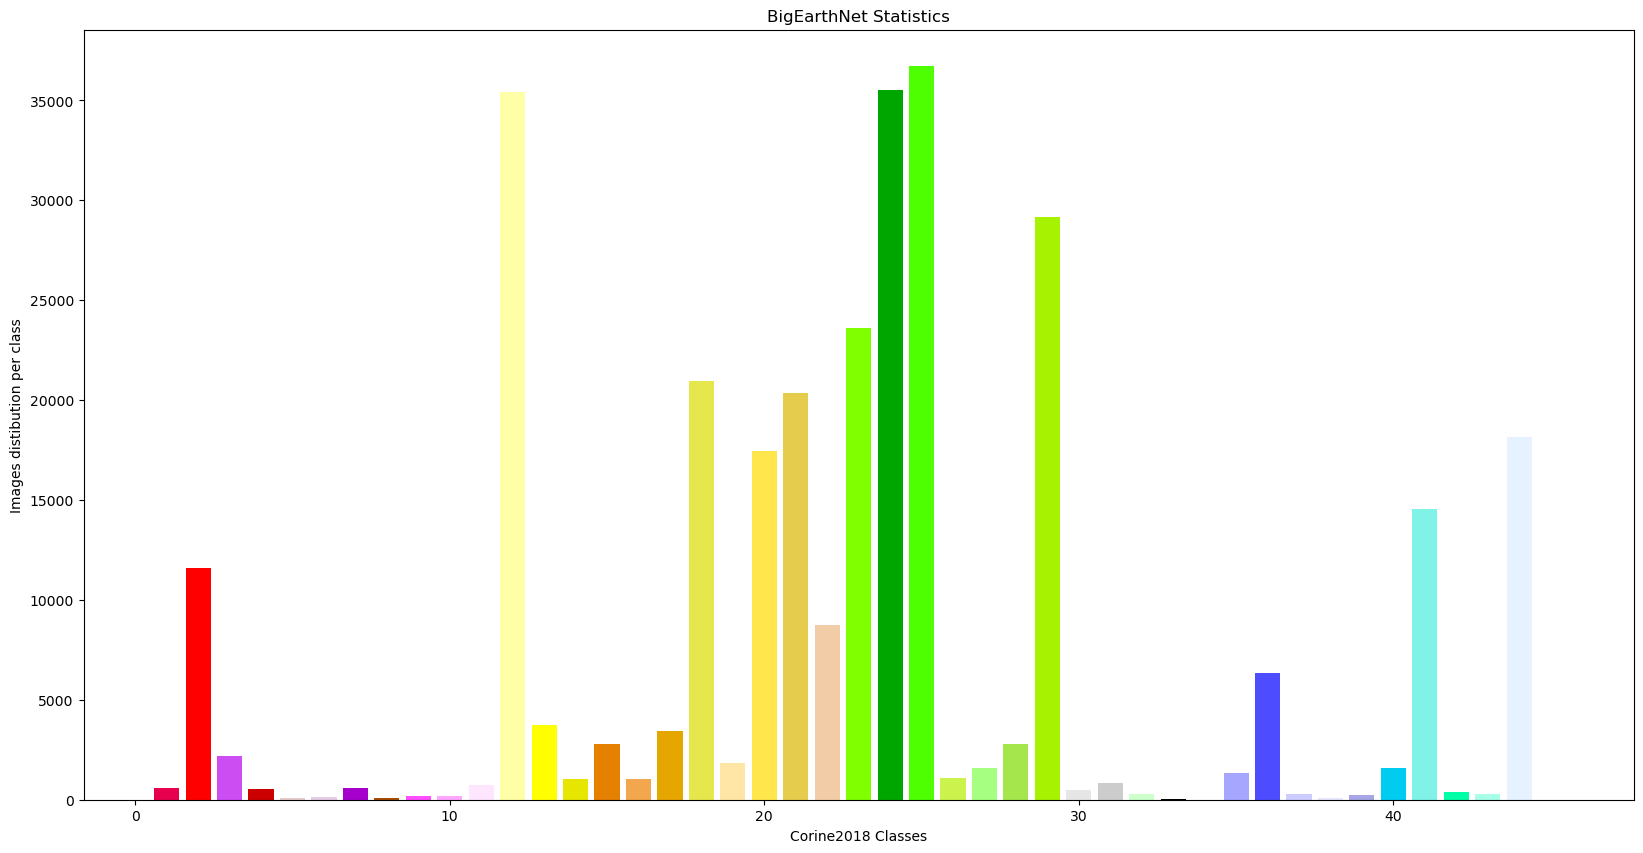

In [53]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_title("BigEarthNet Statistics")
ax.set_xlabel("Corine2018 Classes")
ax.set_ylabel("Images distibution per class");
plt.bar(corine2018_buckets, stats, color=corine2018_colors)